# House price prediction

Problem Statement-Predict the price of house based on different features of house

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [2]:
df=pd.read_csv("C:\\Users\\Jitendra Vaidya\\Downloads\\House Price India.csv")

In [3]:
df.head(20)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0.0,4.0,5.0,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0.0,0.0,5.0,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0.0,0.0,3.0,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0.0,0.0,3.0,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0.0,0.0,4.0,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0.0,0.0,4.0,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,NaN,0.0,2.0,3.0,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.0,0.0,0.0,5.0,...,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.0,0.0,2.0,4.0,...,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.5,0.0,0.0,5.0,...,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000


Checking the shape of data

In [4]:
df.shape

(14620, 23)

In [5]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

Remove unwanted column

In [6]:
df.drop(['id','Date'],axis=1,inplace=True)

Checking for null value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14617 non-null  object 
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14618 non-null  float64
 5   waterfront present                     13647 non-null  float64
 6   number of views                        14618 non-null  float64
 7   condition of the house                 14618 non-null  float64
 8   grade of the house                     14618 non-null  object 
 9   Area of the house(excluding basement)  14616 non-null  float64
 10  Area of the basement                   14617 non-null  float64
 11  Bu

Checking for duplicated value

In [8]:
df.duplicated().sum()

0

Checking null value

In [9]:
df.isna().sum()

number of bedrooms                         0
number of bathrooms                        0
living area                                3
lot area                                   0
number of floors                           2
waterfront present                       973
number of views                            2
condition of the house                     2
grade of the house                         2
Area of the house(excluding basement)      4
Area of the basement                       3
Built Year                                 0
Renovation Year                            0
Postal Code                                0
Lattitude                                  0
Longitude                                  0
living_area_renov                          0
lot_area_renov                             0
Number of schools nearby                   0
Distance from the airport                  0
Price                                      0
dtype: int64

Calculate the precentage of null value

In [10]:
(df.isna().sum()/df.shape[0])*100

number of bedrooms                       0.000000
number of bathrooms                      0.000000
living area                              0.020520
lot area                                 0.000000
number of floors                         0.013680
waterfront present                       6.655267
number of views                          0.013680
condition of the house                   0.013680
grade of the house                       0.013680
Area of the house(excluding basement)    0.027360
Area of the basement                     0.020520
Built Year                               0.000000
Renovation Year                          0.000000
Postal Code                              0.000000
Lattitude                                0.000000
Longitude                                0.000000
living_area_renov                        0.000000
lot_area_renov                           0.000000
Number of schools nearby                 0.000000
Distance from the airport                0.000000


Droping the column having more null value

In [11]:
df.drop("waterfront present",axis=1,inplace=True)
    

Checking for unique value

In [12]:
df["living area"].unique()

array(['3650', '2920', '2910', '3310', '2710', '2600', '3660', '2240',
       '2390', '2200', '2820', '1820', '1520', '1750', '2730', '2360',
       '3240', '2330', '1940', '2860', '1600', '2190', '880', '2210',
       '1710', '2680', '2430', '1270', '2160', '800', '1770', '1970',
       '1450', '1920', '2000', '1570', '1930', '1960', '3630', '1320',
       '1560', '3110', '1090', '1350', '1580', '1160', '1340', '850',
       '2540', '1630', '1850', '2090', '1800', '1180', '1480', '1370',
       '1200', '1210', '900', '1650', '1010', '2850', '2280', '2530',
       '13540', '2220', '4010', '4340', '3190', '1330', '4420', '4490',
       '3690', '2170', '3400', '3180', '2350', '2120', '2010', '2450',
       '2490', '1680', '2800', '1390', '2440', '1990', '2300', '1670',
       '1880', '1900', '1140', '2740', '2550', '1790', '2070', '3200',
       '2340', '3040', nan, '1590', '1410', '1408', '1620', '2110', '840',
       '2230', '3090', '1571', '1120', '2370', '2310', '1050', '1550',
     

Create a function to handle unique value

In [13]:
def handle_LArea(value):
    if value=="NEW":
        return np.nan
    else:
        return float(value)
    
df["living area"]=df["living area"].apply(handle_LArea)
    

Replace Null Value with Mean

In [14]:
df["living area"].fillna(df["living area"].mean(),inplace=True)

In [15]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         2
number of views                          2
condition of the house                   2
grade of the house                       2
Area of the house(excluding basement)    4
Area of the basement                     3
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [16]:
df["number of floors"].unique()

array([2. , 1.5, 1. , nan, 2.5, 3. , 3.5])

Filling Null Value With Mean

In [17]:
df["number of floors"].fillna(df["number of floors"].mean(),inplace=True)

In [18]:
df.isnull().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
number of views                          2
condition of the house                   2
grade of the house                       2
Area of the house(excluding basement)    4
Area of the basement                     3
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [19]:
df["number of views"].unique()

array([ 4.,  0.,  2.,  1.,  3., nan])

In [20]:
df["number of views"].fillna(df["number of views"].mean(),inplace=True)

In [21]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
number of views                          0
condition of the house                   2
grade of the house                       2
Area of the house(excluding basement)    4
Area of the basement                     3
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [22]:
df["condition of the house"].unique()

array([ 5.,  3.,  4.,  2., nan,  1.])

In [23]:
df["condition of the house"].fillna(df["condition of the house"].mean(),inplace=True)

In [24]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
number of views                          0
condition of the house                   0
grade of the house                       2
Area of the house(excluding basement)    4
Area of the basement                     3
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

Checking unique Value

In [25]:
df["grade of the house"].unique()

array(['10', '8', '9', '7', nan, '6', '12', '11', '?', '5', '4', '13'],
      dtype=object)

Create a Function to handle Null Value

In [26]:
def handle_GOH(value):
    if value=="?":
        return np.nan
    else:
        return float(value)
df["grade of the house"]=df["grade of the house"].apply(handle_GOH)

Handle Null Value With Mean

In [27]:
df["grade of the house"].fillna(df["grade of the house"].mean(),inplace=True)

In [28]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    4
Area of the basement                     3
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [29]:
df["Area of the house(excluding basement)"].fillna(df["Area of the house(excluding basement)"].mean(),inplace=True)

In [30]:
df["Area of the basement"].fillna(df["Area of the basement"].mean(),inplace=True)

In [31]:
df.isna().sum()

number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  float64
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   number of views                        14620 non-null  float64
 6   condition of the house                 14620 non-null  float64
 7   grade of the house                     14620 non-null  float64
 8   Area of the house(excluding basement)  14620 non-null  float64
 9   Area of the basement                   14620 non-null  float64
 10  Built Year                             14620 non-null  int64  
 11  Re

# Data is clean lets jump to Visualization

Scatter plot for Longitute and Lattitude it gives the different location in india for which we are predicting the price of house

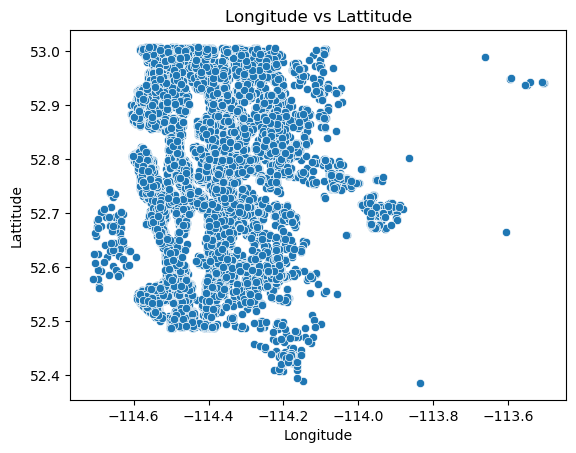

In [33]:
sns.scatterplot(x="Longitude",y="Lattitude",data=df)
plt.title("Longitude vs Lattitude")
plt.show()

Scatter plot used to find the correlation between to numerical value
Here we can see there is positive correlation

C:\Users\Jitendra Vaidya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


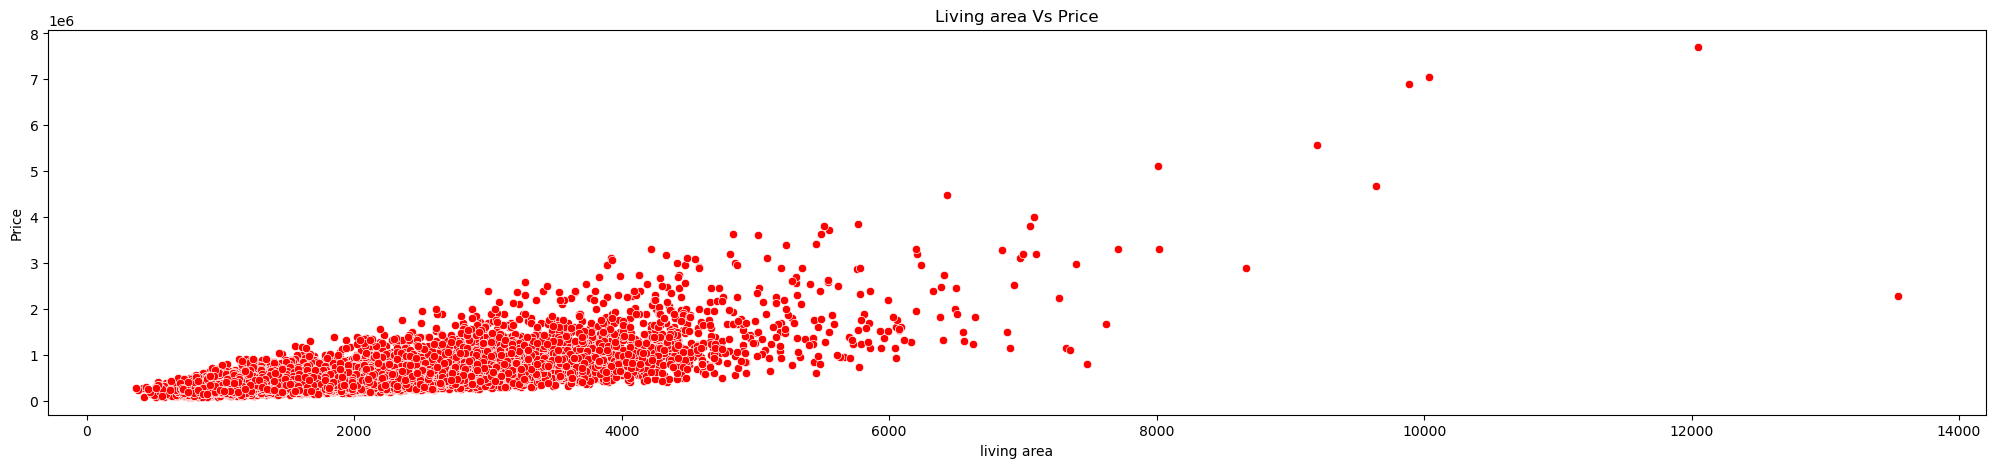

In [34]:
plt.figure(figsize=(25,5))
sns.scatterplot(df["living area"],df["Price"],color="Red")
plt.title("Living area Vs Price")
plt.show()

C:\Users\Jitendra Vaidya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


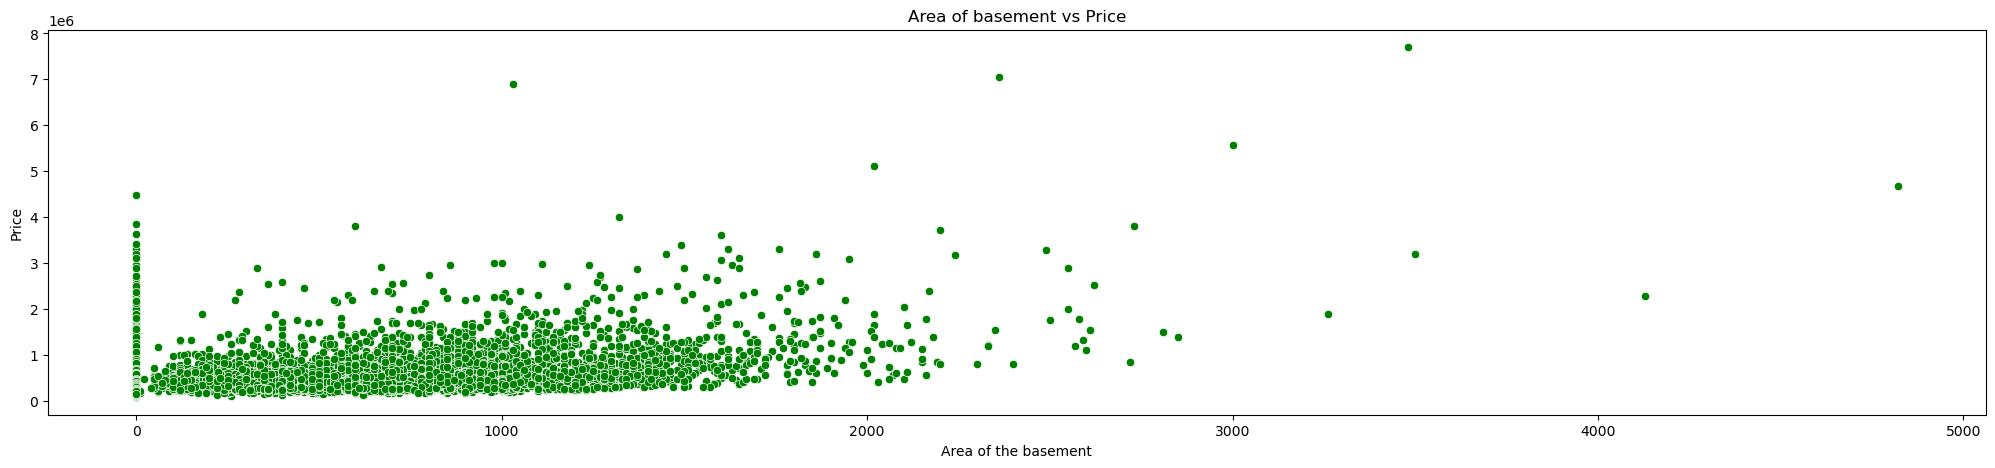

In [35]:
plt.figure(figsize=(25,5))
sns.scatterplot(df["Area of the basement"],df["Price"],color="green")
plt.title("Area of basement vs Price")
plt.show()

C:\Users\Jitendra Vaidya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


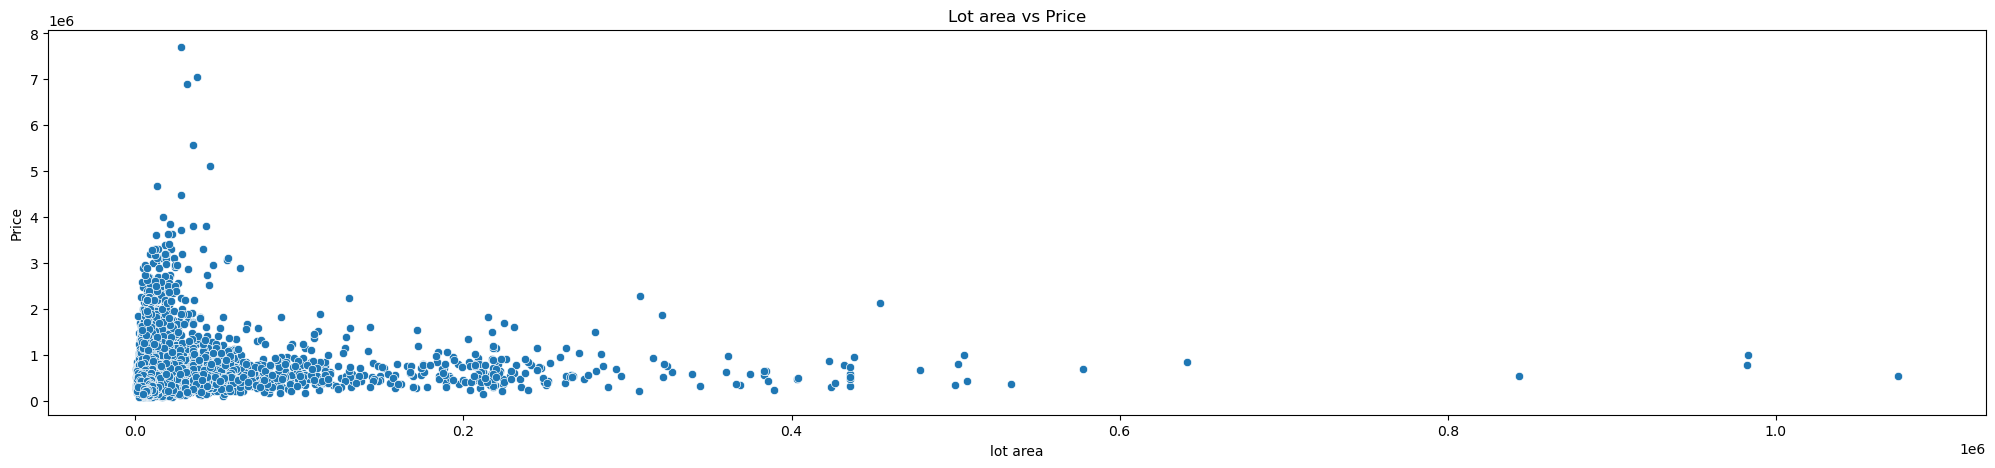

In [36]:
plt.figure(figsize=(25,5))
sns.scatterplot(df["lot area"],df["Price"])
plt.title("Lot area vs Price")
plt.show()

C:\Users\Jitendra Vaidya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


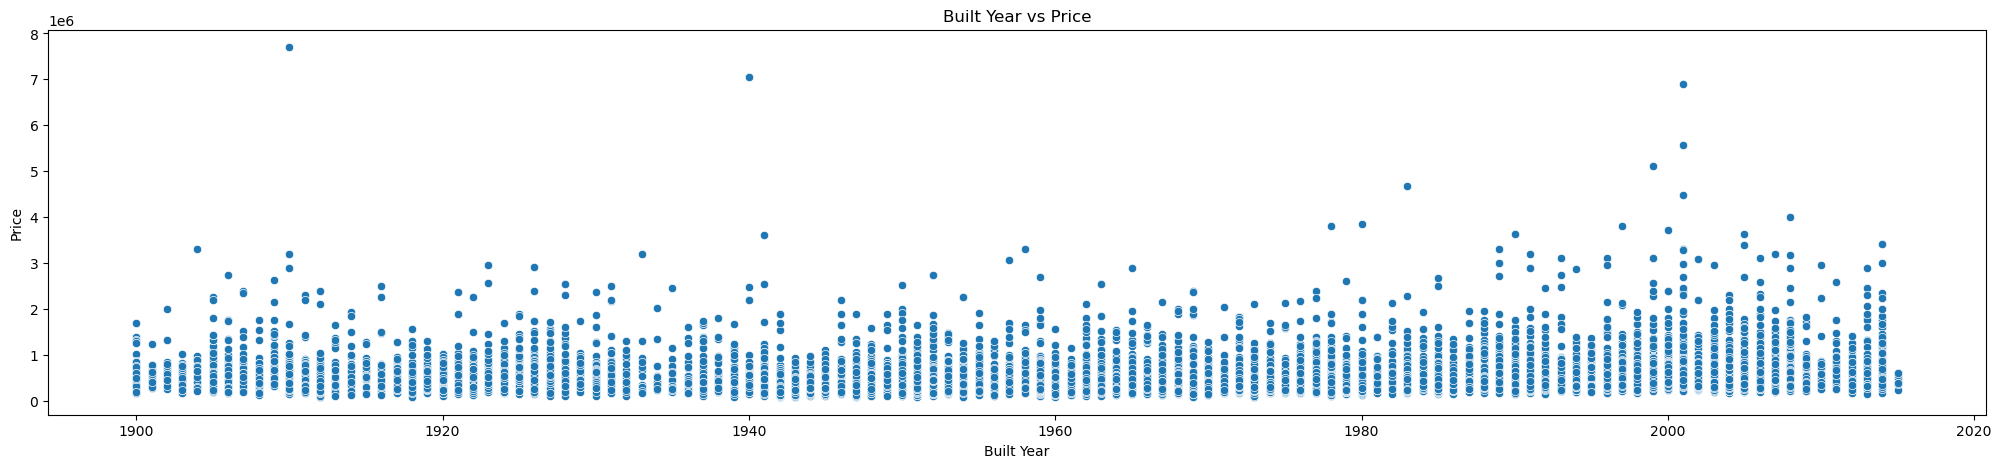

In [37]:
plt.figure(figsize=(25,5))
sns.scatterplot(df["Built Year"],df["Price"])
plt.title("Built Year vs Price")
plt.show()

Box Plot-it is used to find out the outlier

C:\Users\Jitendra Vaidya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


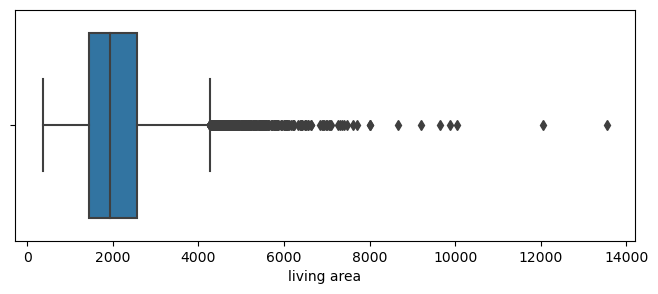

In [38]:
plt.figure(figsize=(8,3))
sns.boxplot(df["living area"])
plt.show()

In [39]:
df.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2.129583,2098.367885,1.509328e+04,1.502360,0.233137,3.430497,7.682425,1801.949986,296.477663,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,0.938719,0.769934,928.242611,3.791962e+04,0.540207,0.766254,0.664125,1.175013,833.731939,448.509301,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


Create a function that will handle the outlier

In [40]:
outliers=[]
def outlier(x):
    q1=1440.00    #it is find out from describe function 25% value
    q3=2570.00    #it is find out from describe function 75% Value
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    for i in x:
        if i>upper or i<lower:
            outliers.append(i)
    return len(outliers)

In [41]:
outlier(df["living area"])

395

Heat Map-To calculate the correlation between different columns 

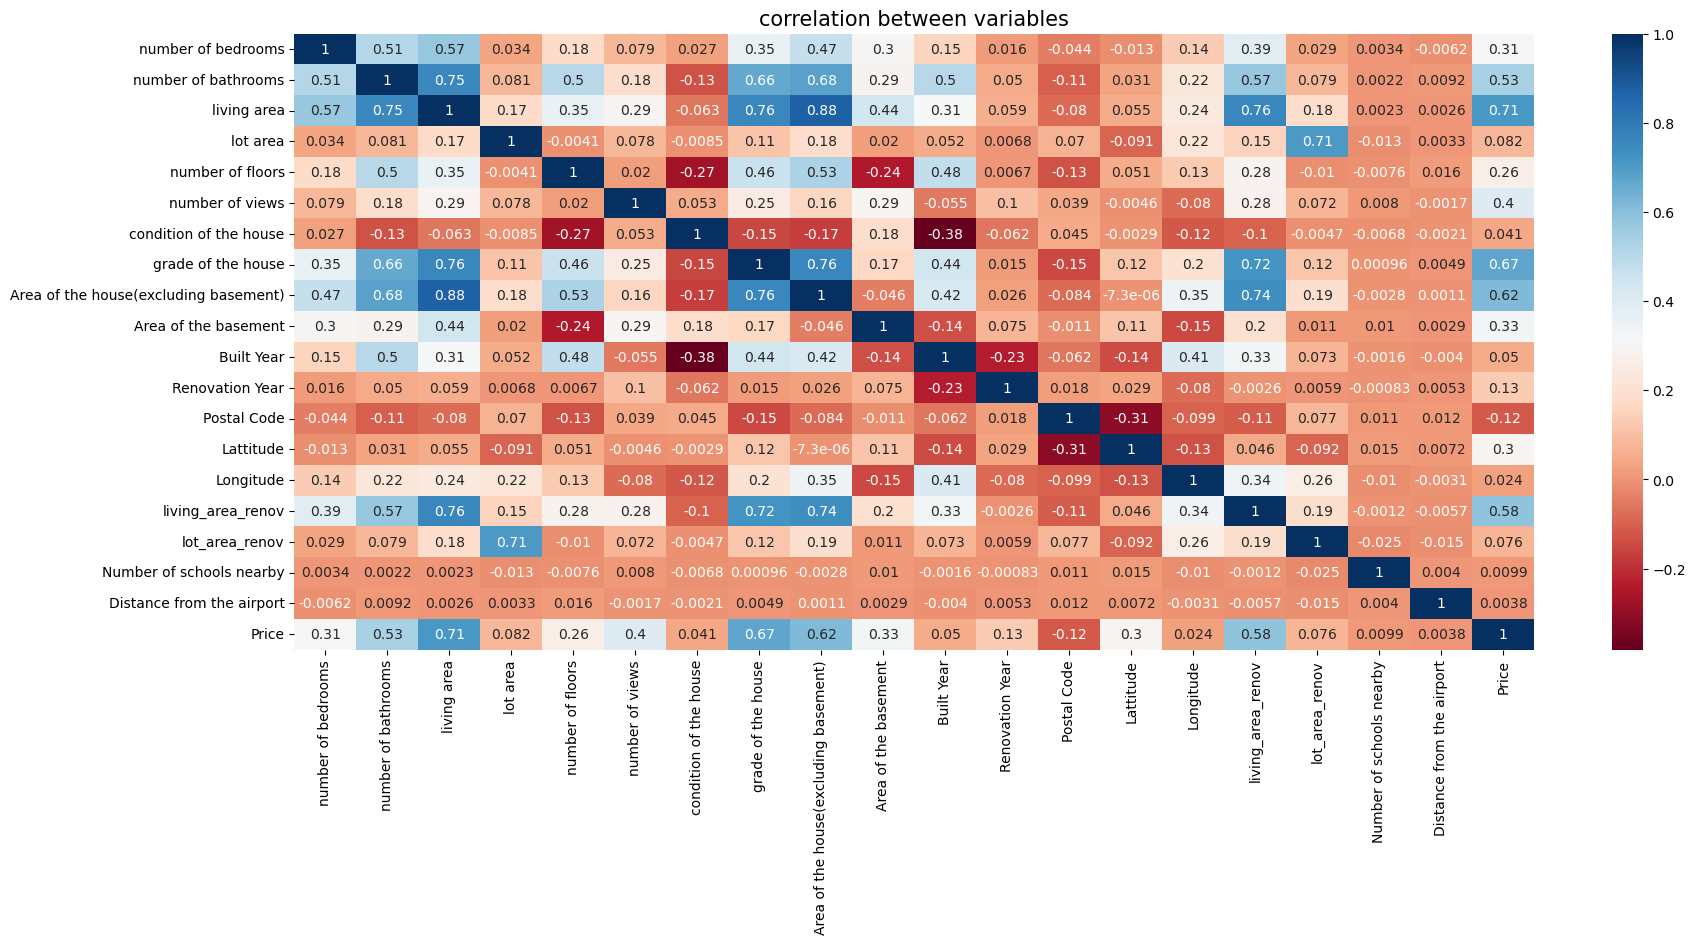

In [42]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap="RdBu",annot=True)
plt.title("correlation between variables",size=15)
plt.show()

#Area of house/living area=0.88
#Living area renovation/living area=0.76
#number of bathrooms/living area=0.75

Text(0.5, 1.0, 'House price according to grade')

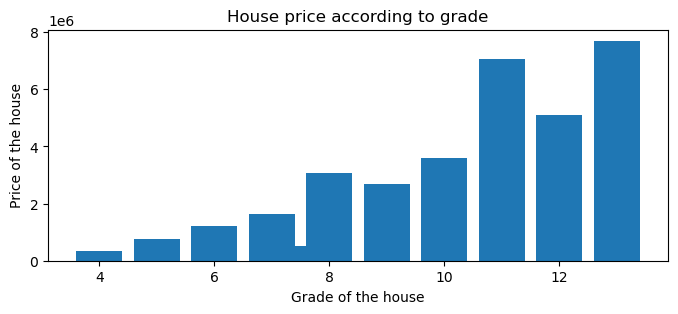

In [43]:
plt.figure(figsize=(8,3))
plt.bar(df["grade of the house"],df["Price"])
plt.xlabel("Grade of the house")
plt.ylabel("Price of the house")
plt.title("House price according to grade")

In [44]:
df["Price"].value_counts()

450000    114
350000    113
400000    104
375000    103
550000    102
         ... 
561600      1
856500      1
907687      1
307999      1
146000      1
Name: Price, Length: 2901, dtype: int64

Distplot_it is used to find the skewness in data

In [45]:
df["Price"].describe()

count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

C:\Users\Jitendra Vaidya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


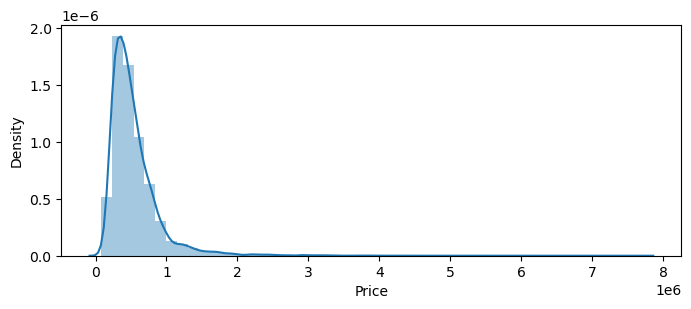

In [46]:
plt.figure(figsize=(8,3))
sns.distplot(df["Price"],kde=True)
plt.show()
#It is right skewed data
#Mean>Median>mode


# LINEAR REGRESSION

In [47]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

x=df.drop("Price",axis=1)
y=df["Price"]



Standard scaler method is used for preprocessing data into same scale

In [48]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [49]:
scale.fit(x)

StandardScaler()

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(10234, 19)
(4386, 19)
(10234,)
(4386,)


In [51]:
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
pred=lr.predict(x_test)

In [53]:
lr.coef_

array([-3.55321173e+04,  4.34127854e+04,  7.37684572e+01, -8.23710504e-02,
       -9.91773446e+01,  8.07360525e+04,  3.63114830e+04,  9.77125868e+04,
        1.15476158e+02,  7.58847380e+01, -2.34049879e+03,  2.96903543e+01,
        2.66379129e+02,  5.52648242e+05, -9.51581140e+04,  1.10668200e+01,
       -3.10550149e-01,  2.04237473e+03, -4.34846841e+01])

In [54]:
lr.intercept_

-68689674.03612646

In [55]:
from sklearn.metrics import mean_squared_error,r2_score

print(mean_squared_error(pred,y_test))



42909487409.470314


In [56]:
print(r2_score(pred,y_test))

0.535886448693373


In [57]:
lr.score(x_train,y_train)

0.6893376743444021

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
scaling.fit(x)

MinMaxScaler()

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [76]:
pred1=lr.predict(x_test)

In [77]:
r2_score(pred1,y_test)

0.535886448693373

In [78]:
lr.score(x_train,y_train)

0.6893376743444021

# DECISION TREE 

In [58]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [59]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)



DecisionTreeRegressor()

In [60]:
pred1=dtr.predict(x_test)

In [61]:
dtr.score(x_train,y_train)

1.0

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,pred1)

0.7418251903471665

# RANDOM FOREST 

In [63]:
#random forest
from sklearn.ensemble import RandomForestRegressor

In [64]:
classifier=RandomForestRegressor(n_estimators=100)


In [65]:
from sklearn.metrics import r2_score

In [66]:
classifier.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
y_pred=classifier.predict(x_test)

In [68]:
r2_score(y_pred,y_test)

0.8566439996997873

In [69]:
classifier.score(x_train,y_train)

0.9786226743831108

#### Conclusion-The best accuracy we are getting is with Random Forest model 84%